# Movie Dataset Exploration

In [1]:
# Setup and Environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Graphic settings
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
# Data Loading
# Loading the locally cleaned datasets
movie_path = "../data/cleaned/movies.csv"
rating_path = "../data/cleaned/ratings.csv"

movie_df = pd.read_csv(movie_path)
rating_df = pd.read_csv(rating_path)

print(f"Movies Dataset: {movie_df.shape[0]} entries")
print(f"Ratings Dataset: {rating_df.shape[0]} entries")
display(movie_df.head())

Movies Dataset: 9627 entries
Ratings Dataset: 100836 entries


,movieId,title,genres,Fantasy,War,Action,Sci-Fi,Mystery,Romance,Children,...,(no genres listed),Adventure,Animation,Crime,Comedy,Horror,IMAX,Western,Thriller,Musical
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",1,0,0,0,0,0,1,...,0,1,1,0,1,0,0,0,0,0
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']",1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']",0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),['Comedy'],0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### General stats

In [3]:
# High-level Statistics
# Understanding the scale of our Recommendation System
total_films = movie_df.shape[0]
total_users = rating_df['userId'].nunique()
total_ratings = rating_df.shape[0]

print(f"Summary Statistics:")
print(f"- Total Unique Films: {total_films}")
print(f"- Total Unique Users: {total_users}")
print(f"- Total Ratings collected: {total_ratings}")

Summary Statistics:
- Total Unique Films: 9627
- Total Unique Users: 610
- Total Ratings collected: 100836


In [4]:
# Popularity Analysis
# Calculating average ratings and popularity to identify 'Top' movies
avg_ratings = rating_df.groupby('movieId')['rating'].mean()
ratings_count = rating_df.groupby('movieId')['rating'].count()

# Merging with movie titles for readability
popularity_df = ratings_count.reset_index(name='rating_count').merge(
    movie_df[['movieId', 'title']], on='movieId'
)

# Identifying the 10 most rated films (Market Leaders)
most_rated = popularity_df.sort_values(by='rating_count', ascending=False).head(10)

print("\nTop 10 Most Rated Films (Popularity Index):")
display(most_rated[['title', 'rating_count']])


Top 10 Most Rated Films (Popularity Index):


,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1936,"Matrix, The (1999)",278
224,Star Wars: Episode IV - A New Hope (1977),251
418,Jurassic Park (1993),238
97,Braveheart (1995),237
507,Terminator 2: Judgment Day (1991),224
461,Schindler's List (1993),220


### Plots

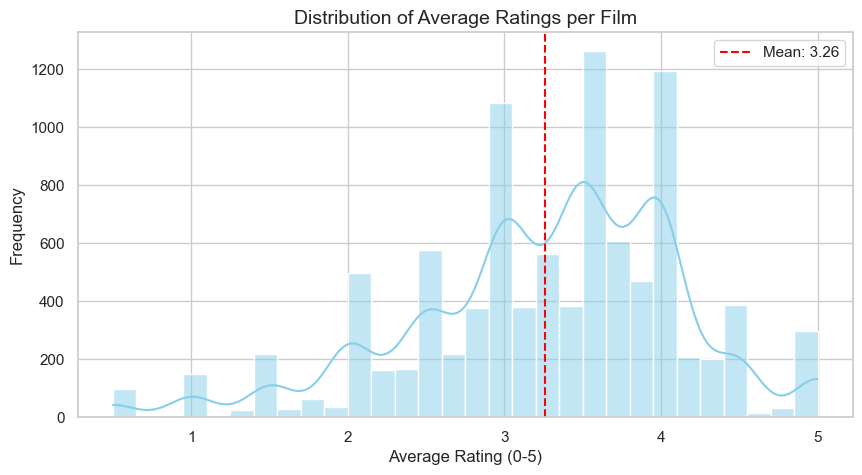

In [5]:
# Visualizing Rating Distribution
# Checking for bias in user ratings (e.g., do users tend to be positive or negative?)
plt.figure(figsize=(10, 5))
sns.histplot(avg_ratings, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Average Ratings per Film", fontsize=14)
plt.xlabel("Average Rating (0-5)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(avg_ratings.mean(), color='red', linestyle='--', label=f'Mean: {avg_ratings.mean():.2f}')
plt.legend()
plt.show()

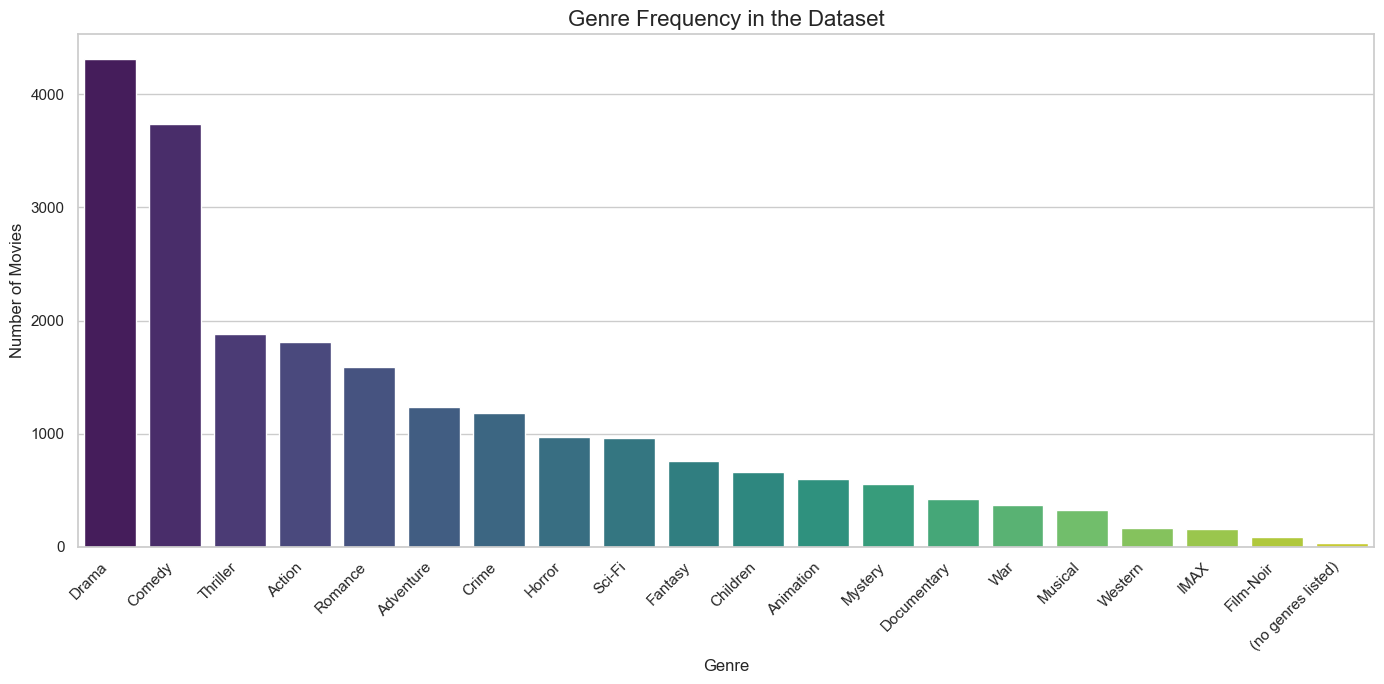

In [7]:
# Genre Distribution Analysis
# Visualizing the prevalence of genres using the one-hot encoded columns
non_genre_cols = ['movieId', 'title', 'genres']
genre_columns = [col for col in movie_df.columns if col not in non_genre_cols]

# Summing up binary columns to get genre counts
genre_counts = movie_df[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(
    x=genre_counts.index, 
    y=genre_counts.values, 
    hue=genre_counts.index, 
    palette="viridis", 
    legend=False
)    
plt.title("Genre Frequency in the Dataset", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()